In [34]:
import pandas as pd
smooth = pd.read_csv('./sensorlab_2018-10-13-07.33.54/accelerometer.csv')
bump = pd.read_csv('./sensorlab_2018-10-13-07.35.49/accelerometer.csv')
pothole = pd.read_csv('./sensorlab_2018-10-13-07.35.57/accelerometer.csv')
rugged = pd.read_csv('./sensorlab_2018-10-13-07.36.07/accelerometer.csv')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

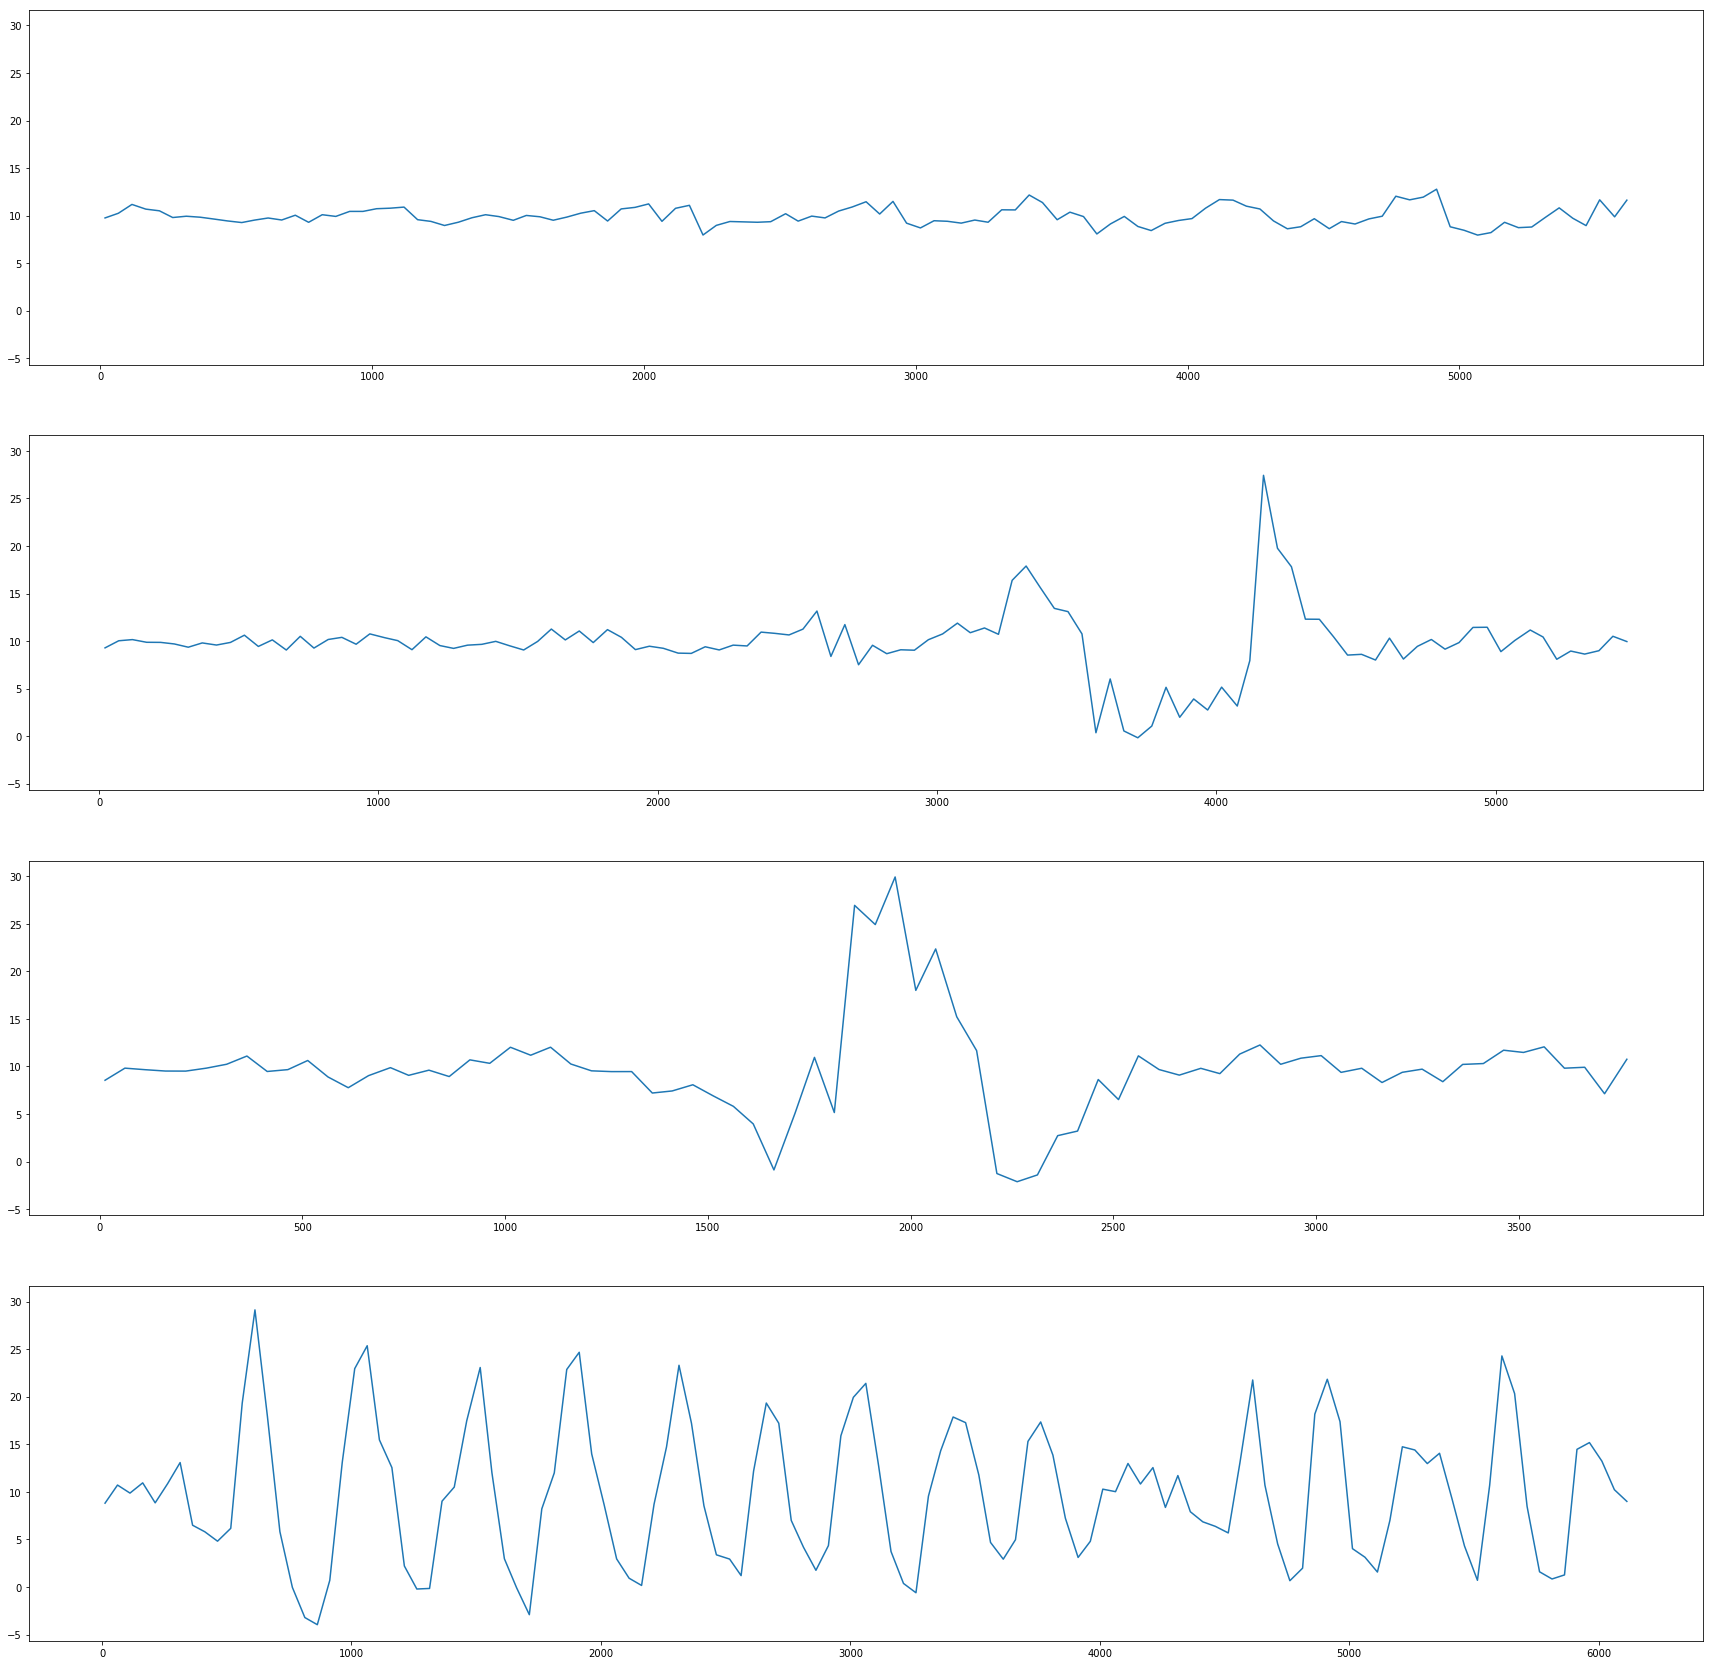

In [18]:
def plot_Device():
    fig, (ax0, ax1, ax2, ax4) = plt.subplots(nrows=4, figsize=(30, 30), sharey=True)
    ax0.plot(smooth.time, smooth.z)
    ax1.plot(bump.time, bump.z)
    ax2.plot(pothole.time, pothole.z)
    ax4.plot(rugged.time, rugged.z)
    plt.subplots_adjust(hspace=0.2)
    plt.show()
    
plot_Device()

In [85]:
def hp_filter(df, value=9.8, field="z", cutoff=4):
    """Returns new dataframe with field replaced with filtered values"""
    df1 = df.copy()
    df1.z = np.where(abs(df[field] - value)> cutoff, df[field], value)
    return df1



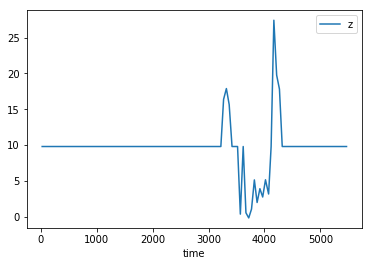

In [90]:
hole2 = hp_filter(bump)
hole2.plot(x='time', y='z')

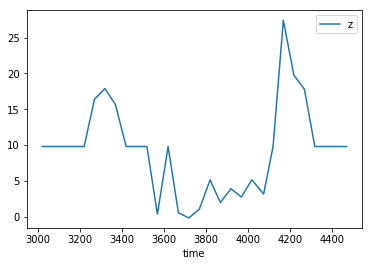

In [135]:
hole3 = hp_filter(bump)
hole3 = hole3[hole3['time'] > 3000]
hole3 = hole3[hole3['time'] < 4500]
hole3.plot(x='time', y='z')


In [110]:
print(len(pothole))
time_extent = (pothole.time.max() - pothole.time.min())
print(time_extent)
sampling_rate = len(pothole)/time_extent
print(sampling_rate, "samples/ms")
print("An event happens over 2 second")
print("Number of samples that cover 1s: ", sampling_rate*2000)
print("Therefore need to consider 40-grams with let's say a stride of 5")
print("However, once an event is detected stop inferencing for let's say 4 seconds ")

76
3754
0.020245071923281833 samples/ms
An event happens over 2 second
Number of samples that cover 1s:  40.49014384656367
Therefore need to consider 40-grams with let's say a stride of 5
However, once an event is detected stop inferencing for let's say 4 seconds 


In [134]:
def slice_event_detector(df):
    pass

def stream_event_detector(df):
    sampling_rate = len(df)/(df.time.max() - df.time.min())
    sampling_window = int(sampling_rate * 4000)
    stride = sampling_window//4
    ignore_loops = sampling_window//stride * 4
    last_event = -1
    print("Time covered in each inference:", sampling_rate*sampling_window)
    print("Number of samples used in each inference:- ",sampling_window)
    print("Number of loops ignored after event is detected", ignore_loops)
    print("Stride", stride)
    for i in range(0, len(df), int(stride)):
        if (i + sampling_window) >= len(df):
            break
        slc = df.iloc[i : i + sampling_window]
        if last_event < 0 and slice_event_detector(slc):
            last_event = ignore_loops
        last_event -= 1
            
        
stream_event_detector(bump)

Time covered in each inference: 1.614975224811892
Number of samples used in each inference:-  80
Number of loops ignored after event is detected 16
Stride 20
